In [49]:
import pickle
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [50]:
# Input file containing data
input_file = 'data_singlevar_regr.txt' 

In [51]:
# Read data
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [52]:
data

array([[ 0.,  1.],
       [ 1.,  3.],
       [ 2.,  5.],
       [ 3.,  7.],
       [ 4.,  9.],
       [ 5., 11.],
       [ 6., 13.],
       [ 7., 15.],
       [ 8., 17.],
       [ 9., 19.],
       [10., 21.],
       [11., 23.],
       [12., 25.],
       [13., 27.],
       [14., 29.],
       [15., 31.]])

In [53]:
X

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.]])

In [54]:
y

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25.,
       27., 29., 31.])

In [55]:
data.shape

(16, 2)

In [56]:
X.shape

(16, 1)

In [57]:
y.shape

(16,)

In [58]:
16*0.75

12.0

In [59]:
16*0.25

4.0

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [61]:
X_train.shape

(12, 1)

In [62]:
X_test.shape

(4, 1)

In [63]:
y_train.shape

(12,)

In [64]:
y_test.shape

(4,)

In [65]:
# Create linear regressor object
regressor = linear_model.LinearRegression()

In [66]:
# Train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression()

In [67]:
# Predict the output
y_test_pred = regressor.predict(X_test)

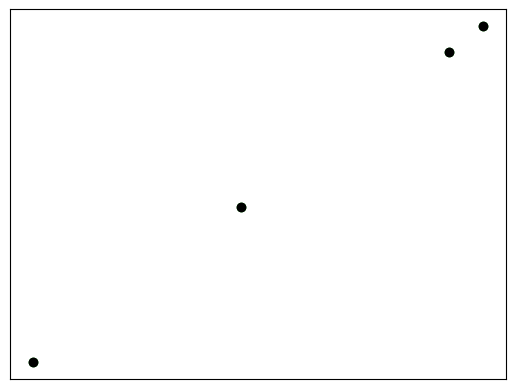

In [68]:
# Plot outputs
plt.scatter(X_test, y_test, color='green') # original label
plt.scatter(X_test, y_test_pred, color='black') # predicted label
#plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

In [69]:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Linear regressor performance:
Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


In [70]:
# Model persistence
output_model_file = 'model.pkl'

# Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)



In [71]:
# Load the model
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

In [72]:
# Perform prediction on test data
y_test_pred_new = regressor_model.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))


New mean absolute error = 0.0


In [73]:
regressor.coef_

array([2.])

In [74]:
regressor.intercept_

1.0000000000000053